<a href="https://colab.research.google.com/github/Hanzala1101/masteck/blob/colab/speaker_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speaker Recognition

Term project for Machine Learning UoT course

The objective of this Notebook is to predict the speaker of an English digit using a Keras model.

This Notebook has three main sections.
1. Extract the features of the WAV files, save them into CSV files and store them into Pandas
2. The model will be trained based on the data set created by https://github.com/Jakobovski/free-spoken-digit-dataset
3. The model will be re-trained based on the previous data plus the recordings made by Ankor (Indian accent), Caroline (Canadian female child accent) and Rodolfo (Brazilian accent)

In [ ]:
cd drive/

[Errno 2] No such file or directory: 'drive/'
/content


In [ ]:
ls

drive/  sample_data/  train.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Section 1

The output of this section is the CSV files with the data to be handle by the model

```
trainData     : ./drive/MyDrive/masteck/train 
testData      : ./drive/MyDrive/masteck/test
moreTrainData : ./drive/MyDrive/masteck/morespeakertrain
moreTestData  : ./drive/MyDrive/masteck/morespeakertest
```


In [ ]:
# If true, the WAV files will be read and their features will be saved in the CSV files
# As this is the most time consuming task, only enable it if you don't have the CSV files yet
CREATE_CSV_FILES = True

In [ ]:
# Defines the names of the CSV files
TRAIN_CSV_FILE = "train.csv"
TEST_CSV_FILE = "test.csv"
MORE_TRAIN_CSV_FILE = "more_train.csv"
MORE_TEST_CSV_FILE = "more_test.csv"


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
import csv
import os

def extractWavFeatures(soundFilesFolder, csvFileName):
    print("The features of the files in the folder "+soundFilesFolder+" will be saved to "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    print('CSV Header: ', header)
    file = open(csvFileName, 'w', newline='')
    #with file:
    writer = csv.writer(file)
    writer.writerow(header)
    genres = '1 2 3 4 5 6 7 8 9 0'.split()
    for filename in os.listdir(soundFilesFolder):
        number = f'{soundFilesFolder}/{filename}'
        y, sr = librosa.load(number, mono=True, duration=30)
        # remove leading and trailing silence
        y, index = librosa.effects.trim(y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        writer.writerow(to_append.split())
    file.close()
    print("End of extractWavFeatures")

if (CREATE_CSV_FILES == True):
    extractWavFeatures("drive/MyDrive/masteck/train", TRAIN_CSV_FILE)
    extractWavFeatures("drive/MyDrive/masteck/test", TEST_CSV_FILE)
    extractWavFeatures("drive/MyDrive/masteck/morespeakertrain", MORE_TRAIN_CSV_FILE)
    extractWavFeatures("drive/MyDrive/masteck/morespeakertest", MORE_TEST_CSV_FILE)
    print("CSV files are created")
else:
    print("CSV files creation is skipped")

The features of the files in the folder drive/MyDrive/masteck/train will be saved to train.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']
End of extractWavFeatures
The features of the files in the folder drive/MyDrive/masteck/test will be saved to test.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']
End of extractWavFeatures
The features of the files in the folder drive/MyDrive/masteck/morespeakertrain will be saved to more_train.csv

In [ ]:
#Reading a dataset and convert file name to corresbonding umnber

import pandas as pd
import csv
from sklearn import preprocessing

def preProcessData(csvFileName):
    print(csvFileName+ " will be preprocessed")
    data = pd.read_csv(csvFileName)
    # we have six speakers: 
    # 0: kunal      un
    # 1: aman       ma
    # 2: techwith tim im
    # 3: thapa     ha
    # 4: codepur    od
    # 5: shradha    hr
    # 6: techchip   ec
    # 7: 5_min_engg _m
    # 8: durgesh    ur
    # 9: cwh        wh
    # 2: anuj       nu
    # 7: krish_niak ri
    
    filenameArray = data['filename'] 
    speakerArray = []
    #print(filenameArray)
    for i in range(len(filenameArray)):
        speaker = filenameArray[i][1:3]
        # print(speaker)
        if speaker == "un":
            speaker = 0
        elif speaker == "ma":
            speaker = 1
        elif speaker == "im":
            speaker = 2
        elif speaker == "ha":
            speaker = 3
        elif speaker == "od":
            speaker = 4
        elif speaker == "hr":
            speaker = 5
        elif speaker == "ec":
            speaker = 6
        elif speaker == "_m":
            speaker = 7
        elif speaker == "ur":
            speaker = 8
        elif speaker == "ri":
            speaker = 9
        elif speaker == "wh":
            speaker = 10
        elif speaker == "nu":
            speaker = 11
        else: 
            speaker = 12
        # print(speaker)
        speakerArray.append(speaker)
    data['number'] = speakerArray
    #Dropping unnecessary columns
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
    data.shape

    print("Preprocessing is finished")
    print(data.head())
    return data

trainData = preProcessData(TRAIN_CSV_FILE)
testData = preProcessData(TEST_CSV_FILE)
moreTrainData = preProcessData(MORE_TRAIN_CSV_FILE)
moreTestData = preProcessData(MORE_TEST_CSV_FILE)

# print(moreTestData)


train.csv will be preprocessed
Preprocessing is finished
       rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0  0.058545        1654.527467         1654.123721  3107.479556   
1  0.041905        1630.322133         1638.303531  3022.511686   
2  0.033386        1535.227515         1625.786775  2873.553535   
3  0.028456        1458.082340         1576.297758  2746.410858   
4  0.020487        1841.398900         1877.986716  3486.846581   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  \
0            0.080926 -258.568237  121.092766 -42.703541  12.638338   
1            0.076441 -294.693604  123.547668 -38.310944  12.168838   
2            0.072235 -319.252991  133.680038 -35.367195  12.306456   
3            0.065836 -338.208801  139.903946 -31.733427  16.713984   
4            0.080190 -385.420197  113.033714 -21.084585  16.589327   

       mfcc5  ...     mfcc12    mfcc13     mfcc14    mfcc15     mfcc16  \
0 -22.529150  ... -16.153675 -3.196240 

## Section 2

There are 50 recordings for each digit for each speaker: Jackson, Nicolas and Theo (total 1500 recordings)

Training data has 49 recordings for each digit for each speaker: 1470 recordings total.
Test data has 1 recordings for each digit for each speaker: 30 recordings total.

The data used here comes from the recordings stored in:
* ./drive/mydrive/masteck/train
* ./drive/mydrive/masteck/test

The model will be trained to predict the speker of a digit.

In [ ]:
trainData.dtypes

rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
number                  int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y= lb.fit_transform(trainData['number'])

In [ ]:
# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split
X = np.array(trainData.iloc[:, :-1], dtype = float)
y = trainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]

print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)
print("Y from test data:", y_test.shape)


Y from training data: (415,)
Y from validation data: (179,)
Y from test data: (6,)


In [ ]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )

print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)
print("X from test data", X_test.shape)


X from training data (415, 25)
X from validation data (179, 25)
X from test data (6, 25)


In [ ]:
#Creating a Model
from keras import models
from keras import layers
import keras

# model 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(14, activation='softmax'))

# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)



In [ ]:
#Train with early stopping to avoid overfitting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=128, 
                    callbacks=[es])

Epoch 1/50
4/4 [==============================] - 1s 89ms/step - loss: 2.6293 - accuracy: 0.1229 - val_loss: 2.0512 - val_accuracy: 0.8715
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 2.1501 - accuracy: 0.2940 - val_loss: 1.6639 - val_accuracy: 0.9944
Epoch 3/50
4/4 [==============================] - 0s 22ms/step - loss: 1.8236 - accuracy: 0.4819 - val_loss: 1.2861 - val_accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 21ms/step - loss: 1.5528 - accuracy: 0.5084 - val_loss: 0.9352 - val_accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 24ms/step - loss: 1.2987 - accuracy: 0.6361 - val_loss: 0.6344 - val_accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 16ms/step - loss: 1.0578 - accuracy: 0.7060 - val_loss: 0.4026 - val_accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 21ms/step - loss: 0.8015 - accuracy: 0.7735 - val_loss: 0.2378 - val_accuracy: 1.0000
Epoch 8/50
4/4 [===========

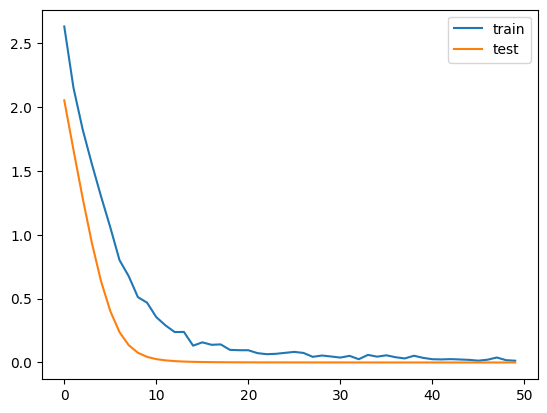

In [ ]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Auxiliary functions to show the results


In [88]:
def getSpeaker(speaker):
    # speaker = str(speaker)
    if (speaker == 0).all():
        return "kunal"
    elif (speaker == 1).all():
        return "aman"
    elif (speaker == 2).all():
        return "tim"
    elif (speaker == 3).all():
        return "thapa"
    elif (speaker == 4).all():
        return "codepure"
    elif (speaker == 5).all():
        return "shradha"
    elif (speaker == 6).all():
        return "techchip"
    elif (speaker == 7).all():
        return "5_min_engg"
    elif (speaker == 8).all():
        return "durgesh"
    elif (speaker == 9).all():
        return "krish_naik"
    elif (speaker == 10).all():
        return "cwh"
    elif (speaker == 11).all():
        return "anuj"
    else: 
        speaker = "Unknown"
        
def printPrediction(X_data, y_data, printDigit):
    print('\n# Generate predictions')
    for i in range(len(y_data)):
        # prediction = getSpeaker(model.predict_classes(X_data[i:i+1])[0])
        prediction = getSpeaker(np.argmax(model.predict(X_data[i:i+1]), axis=-1))
        # prediction = getSpeaker((model.predict(X_data[i:i+1]) > 0.5).astype("int32"))
        
        speaker = getSpeaker(y_data[i])
        # print(speaker,prediction)
        if printDigit == True:
            print('Number={0:d}, y={1:10s}- prediction={2:10s}- match={3}' .format(i, speaker, prediction, speaker==prediction))
        else:
            print('y={0:10s}- prediction={1:10s}- match={2}'.format(speaker, prediction, speaker==prediction))
            # y = '{0:10s}- prediction={1:10s}- match={2}'.format(speaker, prediction, speaker==prediction)


In [78]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

def report(X_data, y_data):
    #Confution Matrix and Classification Report
    # Y_pred = model.predict_classes(X_data)
    Y_pred = np.argmax(model.predict(X_data), axis=-1)
    y_test_num = y_data.astype(np.int64)
    conf_mt = confusion_matrix(y_test_num, Y_pred)
    print(conf_mt)
    plt.matshow(conf_mt)
    plt.show()
    print('\nClassification Report')
    target_names = ["5_min_engg", "aman", "anuj", "codepure", "cwh", "shradha", "Unknown"]
    print(classification_report(y_test_num, Y_pred))


### Present the model performance

In [ ]:
print(X_test[0:10])
y12=y_test[0:10]
print(y12)
# y12[2]

[[-1.38541168  0.1929998   0.19377423  0.3020594  -0.34446257 -1.67727664
  -0.34976036 -1.01642692 -0.39152358 -0.38932056 -1.19492281 -1.02885933
  -0.14165802 -1.23320175  0.27608376 -0.91776846 -0.74138604 -0.88163025
  -1.01834567  1.30714463 -1.79361205 -0.51385237 -0.95014578 -0.50875333
  -0.31968103]
 [-0.72013587  0.38045696  1.54045918  0.35124128 -0.27128323 -0.29233769
  -0.5589013   1.95605096 -0.54049407  0.7983433   1.3172201   1.31148187
   1.34208737  0.00822181  0.73655096  1.0327014   1.28354878 -0.17713967
   1.02298488 -0.46944338  0.52470179  1.03536361  1.602792   -0.0228931
   1.4161949 ]
 [ 1.67693095 -0.42909571 -0.56537164 -0.33473922 -0.30381768  1.84082213
   0.95371425 -1.25805401  0.90387734 -0.74361273  0.81464394 -1.41027908
   1.56840572 -0.63004554  0.63720191  1.48973999 -1.16259409  1.34895902
  -0.37961013  1.75260472 -0.67068762  0.7042085  -0.96733154  0.61440375
   0.56125495]
 [ 0.13666238 -0.80681499 -0.66216697 -0.87078771 -0.57308333  0.140

In [76]:
print('\n# TEST DATA #\n')
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Prediction
printPrediction(X_test[0:10], y_test[0:10], False)


# TEST DATA #

1/1 [==============================] - 0s 29ms/step - loss: 1650.4144 - accuracy: 0.1667
accuracy: 16.67%

# Generate predictions
1/1 [==============================] - 0s 21ms/step
y=aman      - prediction=cwh       - match=False
1/1 [==============================] - 0s 21ms/step
y=cwh       - prediction=cwh       - match=True
1/1 [==============================] - 0s 25ms/step
y=5_min_engg- prediction=cwh       - match=False
1/1 [==============================] - 0s 25ms/step
y=anuj      - prediction=cwh       - match=False
1/1 [==============================] - 0s 26ms/step
y=codepure  - prediction=cwh       - match=False
1/1 [==============================] - 0s 38ms/step
y=shradha   - prediction=cwh       - match=False


Classification Report for Test Data

1/1 [==============================] - 0s 31ms/step
[[0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]]


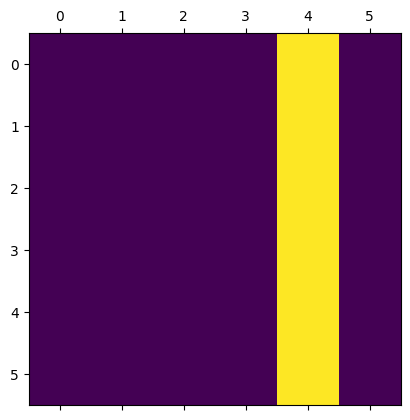


Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          10       0.17      1.00      0.29         1
          11       0.00      0.00      0.00         1

    accuracy                           0.17         6
   macro avg       0.03      0.17      0.05         6
weighted avg       0.03      0.17      0.05         6



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
print("Classification Report for Test Data\n")
report(X_test, y_test)


## Section 3

There are 50 recordings for each digit for each speaker: Jackson, Nicolas and Theo (total 1500 recordings)
Training data has 49 recordings for each digit for each speaker: 1470 recordings total.
Test data has 1 recordings for each digit for each speaker: 30 recordings total.

In addition, there are 2 recordings for each digit for each speaker: Ankur, Caroline and Rodolfo (total 60 recordings)
This addition training data has 1 recordings for each digit for each speaker: 30 recordings total.
This addition test data has 1 recordings for each digit for each speaker: 30 recordings total.

Therefore the full data set has:
* Training: 1500 recordings
* Training: 60 recordings

The data used here comes from the recordings stored in:
* ../data/recordings/train
* ../data/recordings/test
* ../data/recordings/moreSpeakersTrain
* ../data/recordings/moreSpeakersTest

In [80]:
# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split

fullTrainData = trainData.append(moreTrainData)

X = np.array(fullTrainData.iloc[:, :-1], dtype = float)
y = fullTrainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]

X_more_test = np.array(moreTestData.iloc[:, :-1], dtype = float)
y_more_test = moreTestData.iloc[:, -1]

print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)
print("Y from test data:", y_test.shape)
print("Y from other speakers test data:", y_more_test.shape)


Y from training data: (828,)
Y from validation data: (355,)
Y from test data: (6,)
Y from other speakers test data: (12,)


<ipython-input-80-3dec2f3d1234>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fullTrainData = trainData.append(moreTrainData)


In [81]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )
X_more_test = scaler.transform( X_more_test )

print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)
print("X from test data", X_test.shape)
print("X from other speakers test data", X_more_test.shape)


X from training data (828, 25)
X from validation data (355, 25)
X from test data (6, 25)
X from other speakers test data (12, 25)


In [83]:
#Creating a Model
from keras import models
from keras import layers
import keras

# model 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(14, activation='softmax'))

# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

#Train with early stopping to avoid overfitting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=128, 
                    callbacks=[es])

Epoch 1/50
7/7 [==============================] - 2s 59ms/step - loss: 2.6563 - accuracy: 0.1075 - val_loss: 2.2300 - val_accuracy: 0.6479
Epoch 2/50
7/7 [==============================] - 0s 20ms/step - loss: 2.3203 - accuracy: 0.2536 - val_loss: 1.9626 - val_accuracy: 0.7352
Epoch 3/50
7/7 [==============================] - 0s 23ms/step - loss: 2.0625 - accuracy: 0.3249 - val_loss: 1.6436 - val_accuracy: 0.7831
Epoch 4/50
7/7 [==============================] - 0s 16ms/step - loss: 1.8125 - accuracy: 0.4312 - val_loss: 1.2748 - val_accuracy: 0.8310
Epoch 5/50
7/7 [==============================] - 0s 18ms/step - loss: 1.5498 - accuracy: 0.5399 - val_loss: 0.9083 - val_accuracy: 0.9099
Epoch 6/50
7/7 [==============================] - 0s 22ms/step - loss: 1.3069 - accuracy: 0.5954 - val_loss: 0.6184 - val_accuracy: 0.9521
Epoch 7/50
7/7 [==============================] - 0s 19ms/step - loss: 1.0456 - accuracy: 0.6727 - val_loss: 0.4028 - val_accuracy: 0.9803
Epoch 8/50
7/7 [===========

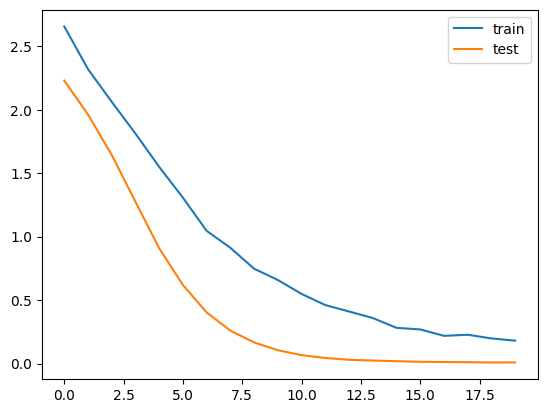

In [84]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Present the model performance

In [85]:
print('\n# TEST DATA #\n')
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Prediction
printPrediction(X_test[0:10], y_test[0:10], False)


# TEST DATA #

1/1 [==============================] - 0s 44ms/step - loss: 7.4036e-04 - accuracy: 1.0000
accuracy: 100.00%

# Generate predictions
1/1 [==============================] - 0s 98ms/step
y=aman      - prediction=aman      - match=True
1/1 [==============================] - 0s 39ms/step
y=cwh       - prediction=cwh       - match=True
1/1 [==============================] - 0s 41ms/step
y=5_min_engg- prediction=5_min_engg- match=True
1/1 [==============================] - 0s 33ms/step
y=anuj      - prediction=anuj      - match=True
1/1 [==============================] - 0s 40ms/step
y=codepure  - prediction=codepure  - match=True
1/1 [==============================] - 0s 32ms/step
y=shradha   - prediction=shradha   - match=True


In [89]:
print('\n# OTHER SPEAKERS DATA #\n')
score = model.evaluate(X_more_test, y_more_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Prediction
printPrediction(X_more_test[0:10], y_more_test[0:10], False)



# OTHER SPEAKERS DATA #

1/1 [==============================] - 0s 29ms/step - loss: 0.0014 - accuracy: 1.0000
accuracy: 100.00%

# Generate predictions
1/1 [==============================] - 0s 20ms/step
y=aman      - prediction=aman      - match=True
1/1 [==============================] - 0s 20ms/step
y=cwh       - prediction=cwh       - match=True
1/1 [==============================] - 0s 22ms/step
y=5_min_engg- prediction=5_min_engg- match=True
1/1 [==============================] - 0s 26ms/step
y=anuj      - prediction=anuj      - match=True
1/1 [==============================] - 0s 40ms/step
y=codepure  - prediction=codepure  - match=True
1/1 [==============================] - 0s 32ms/step
y=shradha   - prediction=shradha   - match=True
1/1 [==============================] - 0s 41ms/step
y=durgesh   - prediction=durgesh   - match=True
1/1 [==============================] - 0s 47ms/step
y=krish_naik- prediction=krish_naik- match=True
1/1 [==============================] - 0s 47ms

Classification Report for Test Data

1/1 [==============================] - 0s 22ms/step
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]


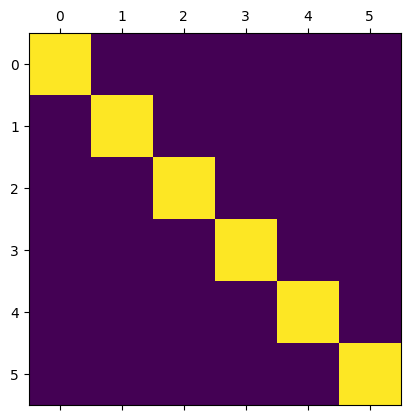


Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Classification Report for Other Speakers

1/1 [==============================] - 0s 24ms/step
[[1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]]


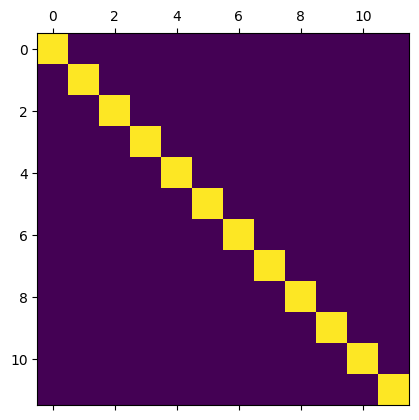


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [87]:
print("Classification Report for Test Data\n")
report(X_test, y_test)

print("Classification Report for Other Speakers\n")
report(X_more_test, y_more_test)
